# Prediction of the Birth Weight of a Baby

## Importing Libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Reading the Data

In [2]:

'''
Data Citation: State Center for Health Statistics, 2009, "North Carolina Vital Statistics -- Births 2008", 
http://hdl.handle.net/1902.29/10446 UNF:5:aTuN+uNcon8IvlxC8H84YQ== 
Odum Institute for Research in Social Science [Distributor] V1 [Version]
'''
birthDF = pd.read_csv('2008_births.csv')


evalDF = pd.DataFrame
pd.set_option('display.max_columns', None)
birthDF.head(10)

,INST,RPLACE,RCOUNTY,PLURAL,BDATE,BMONTH,BDAY,BYEAR,SEX,RACE,FAGE,MAGE,FEDUC,MEDUC,TOTALP,BDEAD,TERMS,LBDATE,LBMONTH,LBYEAR,LOUTCOME,WEEKS,PRENATAL,VISITS,WEIGHT,MARITAL,ATTEND,RECORD,CHILDREN,FDATE,FMONTH,FYEAR,BPOUND,BOUNCE,RACEMOM,RACEDAD,HISPMOM,HISPDAD,CIGNUM,DRINKNUM,GAINED,ANEMIA,CARDIAC,ACLUNG,DIABETES,HERPES,HYDRAM,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,OTHMED,AMNIO,MONITOR,INDUCT,STIMULA,TOCOLY,ULTRA,OTHPROC,FEBRILE,MECONIUM,RUPTURE,ABRUPTIO,PREVIA,BLEEDING,SEIZURES,PRECLAB,PROLAB,DYSLAB,BREECH,CEPHALO,PROLAPSE,ANESTH,DISTRESS,OTHLABOR,VAGINAL,VAGCSECT,PRCSECT,RECSECT,FORCEPS,VACUUM,KOTEL,ANENCEPH,SPINABIF,HYDROCEP,MICROCEP,OTHCNS,HEARTMAL,OTHCIRC,RECTALAT,FISTULA,OMPHALOC,OTHGAST,MALGEN,RANGENE,OTHURO,CLEFT,POLYDACT,CLUBFOOT,DHERNIA,OTHMS,DOWNS,OTHCHROM,OTHER,BCWEEKS,APGAR1,APGAR5,KESSNER,INFANTTR,MOTHERTR,IANEMIA,BINJURY,FAS,HYALINE,ASPIRATE,VENTLESS,VENTMORE,ISEIZURE,OTHINF
0,1,6800,68,1,2008-01-01,1,1,2008,2,1,23,24,12,13,1,0,0,0,0,0,9,35,2,12,3,2,3,1,0,0,0,0,4,1,1,1,N,N,0,0,20,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,8,9,1,2,2,0,0,0,0,0,0,0,0,0
1,1,160,1,1,2008-01-02,1,2,2008,2,2,23,21,14,13,1,0,0,0,0,0,9,40,2,13,7,2,1,1,0,0,0,0,8,3,2,2,N,N,0,0,23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,9,9,1,2,2,0,0,0,0,0,0,0,0,0
2,1,190,1,1,2008-01-02,1,2,2008,1,1,31,28,12,2,3,0,0,52003,5,2003,1,36,4,8,8,1,3,1,2,0,0,0,9,0,1,1,M,S,0,0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,8,9,2,2,2,0,0,0,0,0,0,0,0,0
3,1,4100,41,1,2008-01-03,1,3,2008,2,1,21,19,12,13,1,0,0,0,0,0,9,38,2,10,6,2,1,1,0,0,0,0,7,6,1,1,N,N,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,9,9,1,2,2,0,0,0,0,0,0,0,0,0
4,1,160,1,1,2008-01-03,1,3,2008,2,1,26,21,14,13,1,0,0,0,0,0,9,42,2,12,8,1,1,1,0,0,0,0,9,7,1,1,N,N,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,8,9,1,2,2,0,0,0,0,0,0,0,0,0
5,1,100,1,1,2008-01-03,1,3,2008,2,1,19,20,12,12,2,0,1,0,0,0,2,37,3,10,5,1,1,1,0,92004,9,2004,6,8,1,1,N,N,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,8,9,1,2,2,0,0,0,0,0,0,0,0,0
6,1,100,1,1,2008-01-03,1,3,2008,1,1,37,26,14,14,2,0,0,52002,5,2002,1,39,1,14,4,2,1,1,1,0,0,0,5,8,1,1,N,N,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,8,9,1,2,2,0,0,0,0,0,0,0,0,0
7,1,100,1,2,2008-01-03,1,3,2008,1,1,26,31,12,14,3,0,0,32003,3,2003,1,37,2,20,4,1,1,1,2,0,0,0,5,2,1,1,N,N,0,0,38,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,8,9,1,2,2,0,0,0,0,0,0,0,0,0
8,1,100,1,2,2008-01-03,1,3,2008,2,1,26,31,12,14,4,0,0,12008,1,2008,1,37,2,20,4,1,1,1,3,0,0,0,4,15,1,1,N,N,0,0,38,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,8,9,1,2,2,0,0,0,0,0,0,0,0,0
9,1,162,1,1,2008-01-03,1,3,2008,2,2,29,25,13,12,3,0,0,62001,6,2001,1,39,3,10,6,2,3,1,2,0,0,0,7,4,2,2,N,N,0,0,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,8,9,1,2,2,0,0,0,0,0,0,0,0,0


In [3]:
birthDF.shape

(133422, 125)

In [4]:
birthDF.columns.values

array(['INST', 'RPLACE', 'RCOUNTY', 'PLURAL', 'BDATE', 'BMONTH', 'BDAY',
       'BYEAR', 'SEX', 'RACE', 'FAGE', 'MAGE', 'FEDUC', 'MEDUC', 'TOTALP',
       'BDEAD', 'TERMS', 'LBDATE', 'LBMONTH', 'LBYEAR', 'LOUTCOME',
       'WEEKS', 'PRENATAL', 'VISITS', 'WEIGHT', 'MARITAL', 'ATTEND',
       'RECORD', 'CHILDREN', 'FDATE', 'FMONTH', 'FYEAR', 'BPOUND',
       'BOUNCE', 'RACEMOM', 'RACEDAD', 'HISPMOM', 'HISPDAD', 'CIGNUM',
       'DRINKNUM', 'GAINED', 'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES',
       'HERPES', 'HYDRAM', 'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP',
       'CERVIX', 'PINFANT', 'PRETERM', 'RENAL', 'RHSEN', 'UTERINE',
       'OTHMED', 'AMNIO', 'MONITOR', 'INDUCT', 'STIMULA', 'TOCOLY',
       'ULTRA', 'OTHPROC', 'FEBRILE', 'MECONIUM', 'RUPTURE', 'ABRUPTIO',
       'PREVIA', 'BLEEDING', 'SEIZURES', 'PRECLAB', 'PROLAB', 'DYSLAB',
       'BREECH', 'CEPHALO', 'PROLAPSE', 'ANESTH', 'DISTRESS', 'OTHLABOR',
       'VAGINAL', 'VAGCSECT', 'PRCSECT', 'RECSECT', 'FORCEPS', 'VACUUM',
      

In [5]:
birthDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133422 entries, 0 to 133421
Columns: 125 entries, INST to OTHINF
dtypes: int64(122), object(3)
memory usage: 127.2+ MB


In [6]:
birthDF.describe()

,INST,RPLACE,RCOUNTY,PLURAL,BMONTH,BDAY,BYEAR,SEX,RACE,FAGE,MAGE,FEDUC,MEDUC,TOTALP,BDEAD,TERMS,LBDATE,LBMONTH,LBYEAR,LOUTCOME,WEEKS,PRENATAL,VISITS,WEIGHT,MARITAL,ATTEND,RECORD,CHILDREN,FDATE,FMONTH,FYEAR,BPOUND,BOUNCE,RACEMOM,RACEDAD,CIGNUM,DRINKNUM,GAINED,ANEMIA,CARDIAC,ACLUNG,DIABETES,HERPES,HYDRAM,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,OTHMED,AMNIO,MONITOR,INDUCT,STIMULA,TOCOLY,ULTRA,OTHPROC,FEBRILE,MECONIUM,RUPTURE,ABRUPTIO,PREVIA,BLEEDING,SEIZURES,PRECLAB,PROLAB,DYSLAB,BREECH,CEPHALO,PROLAPSE,ANESTH,DISTRESS,OTHLABOR,VAGINAL,VAGCSECT,PRCSECT,RECSECT,FORCEPS,VACUUM,KOTEL,ANENCEPH,SPINABIF,HYDROCEP,MICROCEP,OTHCNS,HEARTMAL,OTHCIRC,RECTALAT,FISTULA,OMPHALOC,OTHGAST,MALGEN,RANGENE,OTHURO,CLEFT,POLYDACT,CLUBFOOT,DHERNIA,OTHMS,DOWNS,OTHCHROM,OTHER,BCWEEKS,APGAR1,APGAR5,KESSNER,INFANTTR,MOTHERTR,IANEMIA,BINJURY,FAS,HYALINE,ASPIRATE,VENTLESS,VENTMORE,ISEIZURE,OTHINF
count,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.0,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.0,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.00000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.00000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000,133422.000000
mean,1.009556,7277.463619,72.270735,1.035346,6.532798,15.708271,2008.0,1.487363,1.470829,42.651189,27.008080,28.757274,13.216434,2.501499,0.064315,0.465051,39403.075212,3.822556,1177.520207,3.916341,38.682639,3.512067,13.299591,6.029793,1.418214,1.245792,1.0,1.061804,8889.899927,0.845917,430.725278,6.728605,7.510133,1.470829,2.726769,1.381429,0.744345,32.676680,0.059623,0.024434,0.032963,0.051551,0.03378,0.035182,0.022612,0.034604,0.070536,0.024216,0.024156,0.025521,0.029875,0.022560,0.023887,0.023962,0.178771,0.020746,0.900781,0.216441,0.17671,0.035257,0.713773,0.014863,0.032963,0.083375,0.037835,0.024156,0.023085,0.020851,0.018213,0.037160,0.022957,0.048725,0.052870,0.028414,0.019157,0.018355,0.055883,0.163744,0.682886,0.015080,0.191205,0.134176,0.011018,0.042482,3.058581,0.015417,0.015342,0.015387,0.015282,0.015335,0.015859,0.015335,0.015312,0.015312,0.015575,0.015387,0.015672,0.015350,0.015590,0.015859,0.016294,0.015717,0.015365,0.017658,0.015620,0.015425,0.016234,38.485894,8.732031,9.134018,1.302304,1.994813,1.996627,0.018123,0.019884,0.017351,0.019127,0.017981,0.039379,0.024209,0.017606,0.042137
std,0.321152,13494.665067,134.956824,0.194152,3.441613,8.779044,0.0,0.500262,1.226850,27.210713,6.160788,33.492996,6.125150,3.475154,2.189091,3.157302,42323.755303,4.155904,986.495015,3.726115,3.063440,10.339750,10.812163,2.014928,0.502540,0.678575,0.0,2.445117,255

In [7]:
birthDF.isnull().values.sum()

0

In [8]:
birthDF.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

<AxesSubplot:>

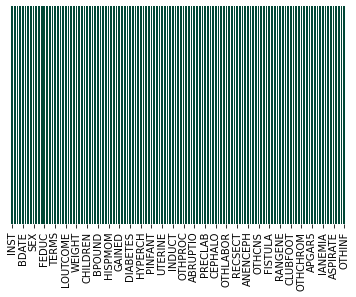

In [9]:
sns.heatmap(birthDF.isnull(),yticklabels=False,cbar=False,cmap='PuBuGn_r')

In [10]:
birthDF.corr()

,INST,RPLACE,RCOUNTY,PLURAL,BMONTH,BDAY,BYEAR,SEX,RACE,FAGE,MAGE,FEDUC,MEDUC,TOTALP,BDEAD,TERMS,LBDATE,LBMONTH,LBYEAR,LOUTCOME,WEEKS,PRENATAL,VISITS,WEIGHT,MARITAL,ATTEND,RECORD,CHILDREN,FDATE,FMONTH,FYEAR,BPOUND,BOUNCE,RACEMOM,RACEDAD,CIGNUM,DRINKNUM,GAINED,ANEMIA,CARDIAC,ACLUNG,DIABETES,HERPES,HYDRAM,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,OTHMED,AMNIO,MONITOR,INDUCT,STIMULA,TOCOLY,ULTRA,OTHPROC,FEBRILE,MECONIUM,RUPTURE,ABRUPTIO,PREVIA,BLEEDING,SEIZURES,PRECLAB,PROLAB,DYSLAB,BREECH,CEPHALO,PROLAPSE,ANESTH,DISTRESS,OTHLABOR,VAGINAL,VAGCSECT,PRCSECT,RECSECT,FORCEPS,VACUUM,KOTEL,ANENCEPH,SPINABIF,HYDROCEP,MICROCEP,OTHCNS,HEARTMAL,OTHCIRC,RECTALAT,FISTULA,OMPHALOC,OTHGAST,MALGEN,RANGENE,OTHURO,CLEFT,POLYDACT,CLUBFOOT,DHERNIA,OTHMS,DOWNS,OTHCHROM,OTHER,BCWEEKS,APGAR1,APGAR5,KESSNER,INFANTTR,MOTHERTR,IANEMIA,BINJURY,FAS,HYALINE,ASPIRATE,VENTLESS,VENTMORE,ISEIZURE,OTHINF
INST,1.000000,-0.002168,-0.002205,0.000353,0.001096,-0.000098,NaN,-0.000485,-0.008338,-0.009962,0.020951,-0.011670,0.013888,-0.014737,-0.015576,-0.013009,-0.001778,-0.001739,-0.002986,0.001282,0.007806,-0.009344,-0.013983,0.005791,-0.017936,0.059899,NaN,-0.017102,0.010930,0.010822,0.010449,0.006251,-0.002153,-0.008338,-0.014180,-0.009424,-0.000744,-0.002107,0.003340,-0.001682,-0.002328,-0.002471,0.000893,-0.002096,-0.001673,-0.002166,-0.003853,-0.001722,-0.001664,0.003525,-0.000591,-0.001561,-0.001917,-0.001922,-0.007754,-0.000028,-0.057836,-0.012038,-0.009957,-0.002684,0.015766,-0.001211,-0.001562,-0.002005,-0.001334,-0.001872,-0.001743,0.000139,-0.001349,0.002404,0.002849,-0.002952,-0.004000,-0.002044,-0.001415,-0.001359,-0.003226,-0.009597,0.018889,-0.002906,-0.012638,-0.009853,-0.001351,-0.004244,0.001005,-0.001239,-0.001233,-0.001237,-0.001229,-0.001296,-0.001272,-0.001233,-0.001231,-0.001231,-0.001251,-0.001237,-0.001258,-0.001234,-0.001252,-0.001272,-0.001305,-0.000821,-0.001235,-0.001533,-0.001254,-0.001239,-0.001301,0.008604,-0.047988,-0.079493,-0.008694,-0.018334,-0.013533,-0.001953,-0.002074,-0.001841,-0.002081,-0.001884,-0.001123,-0.001325,-0.001858,-0.004287
RPLACE,-0.002168,1.000000,0.999995,0.009496,-0.000145,0.005561,NaN,-0.000095,-0.007120,-0.025505,0.052512,-0.030028,0.034160,-0.005182,-0.002975,-0.001981,-0.001970,-0.001941,-0.002778,0.003230,-0.004934,-0.008214,0.000879,-0.001531,-0.052165,0.003466,NaN,-0.007912,0.009889,0.010194,-0.002803,-0.000631,0.000501,-0.007120,-0.033069,-0.008437,-0.013359,0.000924,-0.015546,-0.013176,-0.016273,-0.011330,-0.013011,-0.015182,-0.013966,-0.012222,-0.011070,-0.014432,-0.013492,-0.014583,-0.013837,-0.013610,-0.013886,-0.013653,-0.023707,-0.010995,-0.026276,-0.001749,-0.010172,-0.006553,-0.024460,-0.012753,-0.014344,-0.020486,-0.010234,-0.012301,-0.012148,-0.012915,-0.013392,-0.014465,-0.013473,-0.017175,-0.013708,-0.013583,-0.013749,-0.013442,-0.016922,-0.035584,-0.013306,-0.009385,0.001738,0.001930,-0.007916,-0.005217,0.008570,-0.012876,-0.012894,-0.012890,-0.012862,-0.012728,-0.012498,-0.012856,-0.012742,-0.012856,-0.012535,-0.012872,-0.012754,-0.012865,-0.012671,-0.012747,-0.012763,-0.012897,-0.012904,-0.012630,-0.012821,-0.012774,-0.012889,-0.012475,-0.013179,-0.002655,-0.018717,-0.003227,-0.004731,-0.012550,-0.012688,-0.012858,-0.012734,-0.012500,-0.008640,-0.012452,-0.012680,-0.015533
RCOUNTY,-0.002205,0.999995,1.000000,0.009473,-0.000153,0.005551,NaN,-0.000093,-0.007515,-0.025727,0.052487,-0.030252,0.034171,-0.005192,-0.002968,-0.001988,-0.001939,-0.001909,-0.002748,0.003219,-0.004914,-0.008176,0.000920,-0.001474,-0.052455,0.003603,NaN,-0.007917,0.009913,0.010220,-0.002838,-0.000566,0.000491,-0.007515,-0.033415,-0.008295,-0.013284,0.000916,-0.015428,-0.013027,-0.016127,-0.011169,-0.012870,-0.015037,-0.013825,-0.012067,-0.010920,-0.014279,-0.013347,-0.014434,-0.013693,-0.013461,-0.013732,-0.013509,-0.023574,-0.010870,-0.026111,-0.001480,-0.010099,-0.006414,-0.024125,-0.012621,-0.014227,-0.020417,-0.010095,-0.012165,-0.012010,-0.012777,-0.013254,-0.014335,-0.013336,-0.0

# Data Cleaning

## Obtain Filtered Dataset of Relevant Columns

## The following steps are executed as part of the below cell:

In [11]:
global colIndex
global slicedDF
slicedDF = pd.DataFrame

requiredColumns = ['SEX', 'MARITAL','FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC', 'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'BPOUND', 'BOUNCE', 'RACEMOM', 'RACEDAD', 'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP',
                             'CERVIX','PINFANT','PRETERM','RENAL','RHSEN','UTERINE']
#requiredColumns = ['SEX', 'MARITAL','FAGE', 'MAGE', 'FEDUC', 'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'BPOUND', 'BOUNCE', 'WEIGHT', 'RACEMOM', 'RACEDAD', 'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'GAINED', 'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP',
                             #'CERVIX','PINFANT','PRETERM','RENAL','RHSEN','UTERINE']
#requiredColumns = ['SEX', 'MARITAL','FAGE', 'MAGE', 'FEDUC', 'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'BPOUND', 'BOUNCE', 'WEIGHT', 'RACEMOM', 'RACEDAD', 'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'GAINED', 'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HEMOGLOB', 'HYPERCH', 'HYPERPR',
                             #'PINFANT','PRETERM']
slicedDF = birthDF.loc[:,requiredColumns]

print ("Initial number of rows present are:", len(slicedDF))


Initial number of rows present are: 133422


<AxesSubplot:xlabel='BPOUND', ylabel='count'>

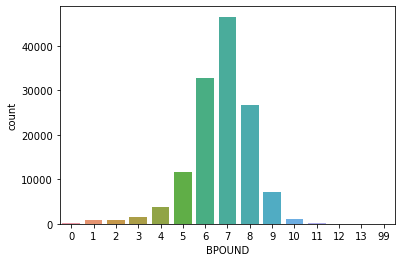

In [12]:
sns.countplot('BPOUND',data=birthDF)

<AxesSubplot:xlabel='BOUNCE', ylabel='count'>

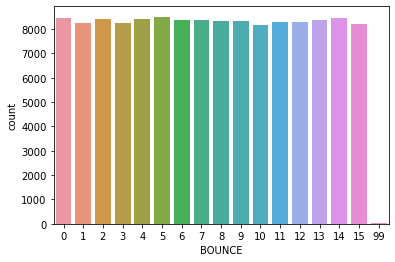

In [13]:
sns.countplot('BOUNCE',data=birthDF)

In [14]:
# The weight of the heaviest baby is around 22 pounds
# Eliminating the outlier weight values.
print(len(birthDF[birthDF['BPOUND']>22]))

slicedDF = slicedDF[slicedDF['BPOUND']<22]
slicedDF = slicedDF[slicedDF['BOUNCE']!=99]

len(slicedDF)


38


133384

In [15]:
#adding a new column for weight in pounds

slicedDF['WEIGHTLB'] =(slicedDF['BPOUND']) + (0.0625 *slicedDF['BOUNCE'])

slicedDF['WEIGHTLB']


0         4.0625
1         8.1875
2         9.0000
3         7.3750
4         9.4375
           ...  
133417    6.5000
133418    9.1250
133419    8.4375
133420    5.8125
133421    7.1875
Name: WEIGHTLB, Length: 133384, dtype: float64

In [16]:
#the following function binarizes the columns
global colIndex
colIndex = 0
def binarizeColumn(x):
    if x == colIndex:
        return 1
    else:
        return 0

def binarizeHisp(x):
    if x == 'N':
        return 0
    else:
        return 1

In [17]:
raceColumns = ['OTHER_NON_WHITE', 'WHITE', 'BLACK', 'AMERICAN_INDIAN', 'CHINESE', 'JAPANESE', 'HAWAIIAN', 'FILIPINO', 'OTHER_ASIAN']
for race in raceColumns:
    slicedDF[race + '_MOM'] = slicedDF['RACEMOM'].map(binarizeColumn)
    colIndex = colIndex + 1
colIndex = 0
for race in raceColumns:
    slicedDF[race + '_DAD'] = slicedDF['RACEDAD'].map(binarizeColumn)
    colIndex = colIndex + 1
    
slicedDF['HISPMOM_BINARY'] = slicedDF['HISPMOM'].map(binarizeHisp)
slicedDF['HISPDAD_BINARY'] = slicedDF['HISPDAD'].map(binarizeHisp)
 
#dropping the old columns of weight and race    
columnsToDrop = ['BPOUND','BOUNCE','RACEMOM','RACEDAD','HISPMOM','HISPDAD']
for column in columnsToDrop:
    slicedDF = slicedDF.drop(column, 1)

In [18]:
slicedDF.columns

Index(['SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC', 'MEDUC',
       'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'CIGNUM', 'DRINKNUM',
       'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM',
       'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT',
       'PRETERM', 'RENAL', 'RHSEN', 'UTERINE', 'WEIGHTLB',
       'OTHER_NON_WHITE_MOM', 'WHITE_MOM', 'BLACK_MOM', 'AMERICAN_INDIAN_MOM',
       'CHINESE_MOM', 'JAPANESE_MOM', 'HAWAIIAN_MOM', 'FILIPINO_MOM',
       'OTHER_ASIAN_MOM', 'OTHER_NON_WHITE_DAD', 'WHITE_DAD', 'BLACK_DAD',
       'AMERICAN_INDIAN_DAD', 'CHINESE_DAD', 'JAPANESE_DAD', 'HAWAIIAN_DAD',
       'FILIPINO_DAD', 'OTHER_ASIAN_DAD', 'HISPMOM_BINARY', 'HISPDAD_BINARY'],
      dtype='object')

On Checking the dataset further we found that most of the features have outlier values in form 99, 98 and 9.
These features are grouped accordingly and the outliers are eliminated.

In [19]:
x=birthDF.max()
pd.DataFrame(x).transpose()

,INST,RPLACE,RCOUNTY,PLURAL,BDATE,BMONTH,BDAY,BYEAR,SEX,RACE,FAGE,MAGE,FEDUC,MEDUC,TOTALP,BDEAD,TERMS,LBDATE,LBMONTH,LBYEAR,LOUTCOME,WEEKS,PRENATAL,VISITS,WEIGHT,MARITAL,ATTEND,RECORD,CHILDREN,FDATE,FMONTH,FYEAR,BPOUND,BOUNCE,RACEMOM,RACEDAD,HISPMOM,HISPDAD,CIGNUM,DRINKNUM,GAINED,ANEMIA,CARDIAC,ACLUNG,DIABETES,HERPES,HYDRAM,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,OTHMED,AMNIO,MONITOR,INDUCT,STIMULA,TOCOLY,ULTRA,OTHPROC,FEBRILE,MECONIUM,RUPTURE,ABRUPTIO,PREVIA,BLEEDING,SEIZURES,PRECLAB,PROLAB,DYSLAB,BREECH,CEPHALO,PROLAPSE,ANESTH,DISTRESS,OTHLABOR,VAGINAL,VAGCSECT,PRCSECT,RECSECT,FORCEPS,VACUUM,KOTEL,ANENCEPH,SPINABIF,HYDROCEP,MICROCEP,OTHCNS,HEARTMAL,OTHCIRC,RECTALAT,FISTULA,OMPHALOC,OTHGAST,MALGEN,RANGENE,OTHURO,CLEFT,POLYDACT,CLUBFOOT,DHERNIA,OTHMS,DOWNS,OTHCHROM,OTHER,BCWEEKS,APGAR1,APGAR5,KESSNER,INFANTTR,MOTHERTR,IANEMIA,BINJURY,FAS,HYALINE,ASPIRATE,VENTLESS,VENTMORE,ISEIZURE,OTHINF
0,9,99959,999,9,2008-12-31,12,31,2008,9,8,99,99,99,99,99,99,99,122008,12,2008,9,99,99,99,99,9,5,1,99,122008,12,2008,99,99,8,9,U,U,99,99,99,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,4,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,99,99,99,4,9,9,9,9,9,9,9,9,9,9,9


<AxesSubplot:xlabel='FEDUC', ylabel='count'>

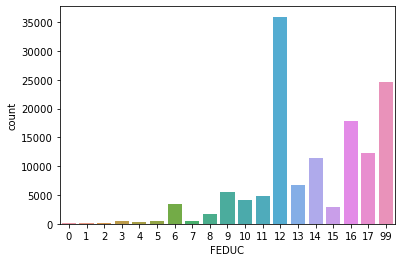

In [20]:
sns.countplot('FEDUC',data=birthDF)

<AxesSubplot:xlabel='CIGNUM', ylabel='count'>

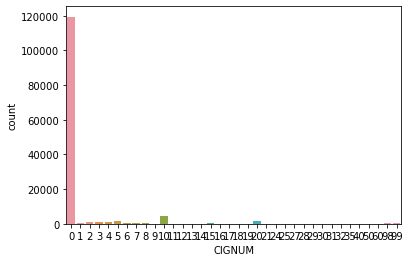

In [21]:
sns.countplot('CIGNUM',data=birthDF)

<AxesSubplot:xlabel='DIABETES', ylabel='count'>

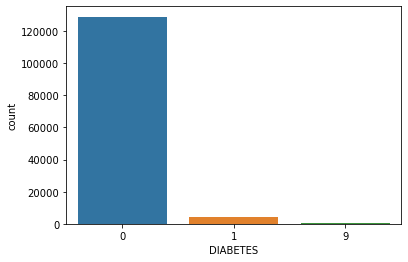

In [22]:
sns.countplot('DIABETES',data=birthDF)

In [23]:

out99Columns = ['MAGE','FEDUC','MEDUC','TOTALP','BDEAD','TERMS','WEEKS','CIGNUM','DRINKNUM','GAINED', 'VISITS']
#out99Columns = ['MAGE','FEDUC','MEDUC','TOTALP','BDEAD','TERMS','WEEKS','WEIGHT','CIGNUM','DRINKNUM']
out9Columns = ['ANEMIA','CARDIAC','ACLUNG','DIABETES','HERPES','HYDRAM','HEMOGLOB','HYPERCH','HYPERPR','ECLAMP'
                   ,'CERVIX','PINFANT','PRETERM','RENAL','RHSEN','UTERINE','MARITAL']
#out9Columns = ['LOUTCOME','ANEMIA','CARDIAC','ACLUNG','DIABETES','HERPES','HEMOGLOB','HYPERCH','HYPERPR',
                   #'PINFANT','PRETERM']
missingValDF = slicedDF[slicedDF['FAGE']!=99]

for col in out99Columns:
    missingValDF = missingValDF[missingValDF[col]!=99]
    
for col in out9Columns:
    missingValDF = missingValDF[missingValDF[col]!=9]
    
out98Columns = ['CIGNUM','DRINKNUM']
for col in out98Columns:
    missingValDF = missingValDF[missingValDF[col]!=98]
    
loutcome = missingValDF['LOUTCOME'][missingValDF['LOUTCOME'] == 9.0]
loutcome[missingValDF['TOTALP'] == 1.0] = 1.0
    
print ("Number of rows after all the filtering are:",len(missingValDF))
print ("Number of features present are:", len(missingValDF.columns))

Number of rows after all the filtering are: 103401
Number of features present are: 52


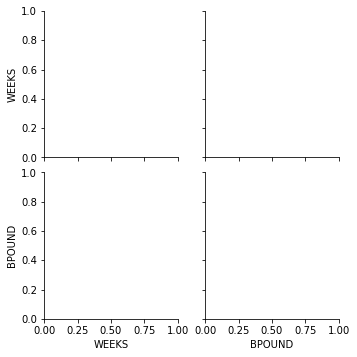

In [24]:

sns.PairGrid(data=birthDF, x_vars=['WEEKS','BPOUND'], y_vars=['WEEKS','BPOUND'])

In [25]:
missingValDF.columns

Index(['SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC', 'MEDUC',
       'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'CIGNUM', 'DRINKNUM',
       'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM',
       'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT',
       'PRETERM', 'RENAL', 'RHSEN', 'UTERINE', 'WEIGHTLB',
       'OTHER_NON_WHITE_MOM', 'WHITE_MOM', 'BLACK_MOM', 'AMERICAN_INDIAN_MOM',
       'CHINESE_MOM', 'JAPANESE_MOM', 'HAWAIIAN_MOM', 'FILIPINO_MOM',
       'OTHER_ASIAN_MOM', 'OTHER_NON_WHITE_DAD', 'WHITE_DAD', 'BLACK_DAD',
       'AMERICAN_INDIAN_DAD', 'CHINESE_DAD', 'JAPANESE_DAD', 'HAWAIIAN_DAD',
       'FILIPINO_DAD', 'OTHER_ASIAN_DAD', 'HISPMOM_BINARY', 'HISPDAD_BINARY'],
      dtype='object')

# Split Relevant Dataset to Training Data and Test Data

In [26]:
trainDF = pd.DataFrame
testDF = pd.DataFrame
from sklearn.model_selection import train_test_split
x =missingValDF.drop('WEIGHTLB',axis=1) 
y = missingValDF['WEIGHTLB']

In [27]:
x

,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,BDEAD,TERMS,LOUTCOME,WEEKS,CIGNUM,DRINKNUM,ANEMIA,CARDIAC,ACLUNG,DIABETES,HERPES,HYDRAM,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,OTHER_NON_WHITE_MOM,WHITE_MOM,BLACK_MOM,AMERICAN_INDIAN_MOM,CHINESE_MOM,JAPANESE_MOM,HAWAIIAN_MOM,FILIPINO_MOM,OTHER_ASIAN_MOM,OTHER_NON_WHITE_DAD,WHITE_DAD,BLACK_DAD,AMERICAN_INDIAN_DAD,CHINESE_DAD,JAPANESE_DAD,HAWAIIAN_DAD,FILIPINO_DAD,OTHER_ASIAN_DAD,HISPMOM_BINARY,HISPDAD_BINARY
0,2,2,23,20,12,24,12,13,1,0,0,9,35,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,2,23,23,13,21,14,13,1,0,0,9,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,1,31,36,8,28,12,2,3,0,0,1,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
3,2,2,21,40,10,19,12,13,1,0,0,9,38,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2,1,26,35,12,21,14,13,1,0,0,9,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133221,1,1,29,33,25,26,17,13,2,0,0,1,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
133223,1,1,38,17,12,33,16,16,3,0,0,9,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
133227,1,2,25,29,9,25,15,13,1,0,0,9,43,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
133228,2,1,30,35,13,26,13,16,1,0,0,9,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [28]:
y

0         4.0625
1         8.1875
2         9.0000
3         7.3750
4         9.4375
           ...  
133221    7.6250
133223    7.6875
133227    8.6875
133228    7.8125
133229    5.6875
Name: WEIGHTLB, Length: 103401, dtype: float64

In [29]:
trainDF,testDF,trainWeight,testWeight = train_test_split(x, y, test_size=0.15, random_state=101)

In [30]:
        print ('Train(len) : {0} rows'.format(str(len(trainDF))))
        print ('Test(len) : {0} rows'.format(str(len(testDF))))

Train(len) : 87890 rows
Test(len) : 15511 rows


In [31]:
trainDF

,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,BDEAD,TERMS,LOUTCOME,WEEKS,CIGNUM,DRINKNUM,ANEMIA,CARDIAC,ACLUNG,DIABETES,HERPES,HYDRAM,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,OTHER_NON_WHITE_MOM,WHITE_MOM,BLACK_MOM,AMERICAN_INDIAN_MOM,CHINESE_MOM,JAPANESE_MOM,HAWAIIAN_MOM,FILIPINO_MOM,OTHER_ASIAN_MOM,OTHER_NON_WHITE_DAD,WHITE_DAD,BLACK_DAD,AMERICAN_INDIAN_DAD,CHINESE_DAD,JAPANESE_DAD,HAWAIIAN_DAD,FILIPINO_DAD,OTHER_ASIAN_DAD,HISPMOM_BINARY,HISPDAD_BINARY
114552,1,1,23,44,11,19,12,12,1,0,0,9,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
109965,2,1,31,11,14,32,12,12,3,0,0,1,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
15471,1,1,31,34,9,30,17,17,2,0,0,1,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
33278,1,1,37,35,11,27,15,14,2,0,0,1,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
66530,1,2,24,30,14,20,16,13,3,0,1,2,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7498,2,1,33,10,9,25,14,14,1,0,0,9,40,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
94357,2,1,32,36,13,36,16,16,4,0,2,2,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
106724,2,1,40,31,14,38,12,12,1,0,0,9,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
106978,1,1,29,26,14,30,13,16,1,0,0,9,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [32]:
testDF

,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,BDEAD,TERMS,LOUTCOME,WEEKS,CIGNUM,DRINKNUM,ANEMIA,CARDIAC,ACLUNG,DIABETES,HERPES,HYDRAM,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,OTHER_NON_WHITE_MOM,WHITE_MOM,BLACK_MOM,AMERICAN_INDIAN_MOM,CHINESE_MOM,JAPANESE_MOM,HAWAIIAN_MOM,FILIPINO_MOM,OTHER_ASIAN_MOM,OTHER_NON_WHITE_DAD,WHITE_DAD,BLACK_DAD,AMERICAN_INDIAN_DAD,CHINESE_DAD,JAPANESE_DAD,HAWAIIAN_DAD,FILIPINO_DAD,OTHER_ASIAN_DAD,HISPMOM_BINARY,HISPDAD_BINARY
2009,2,1,37,34,15,31,14,14,3,0,0,1,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
15546,1,1,24,44,14,22,14,14,2,0,1,2,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
112926,2,2,21,4,18,20,11,12,2,0,0,1,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4674,2,2,29,54,10,27,12,12,1,0,0,9,34,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
33030,2,1,30,36,19,29,17,17,1,0,0,9,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52224,1,1,22,28,12,19,12,12,3,0,0,1,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
18646,1,1,28,14,14,28,16,14,1,0,0,9,37,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
127499,1,2,24,30,12,21,13,14,2,0,1,2,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
133127,2,1,29,25,15,28,13,16,4,0,1,1,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Test case of Sammi

In [33]:
testDF=testDF.sort_index()

In [34]:
testDF.index[len(testDF.index)-1 ]

133223

In [35]:
sammiRow = [2, 1, 27, 20, 11, 27, 16, 12, 1, 0, 0, 1, 40, 0, 0.25, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lastIndex = testDF.index[len(testDF.index) - 1]
testDF.loc[lastIndex + 1] = sammiRow

In [36]:
lastIndex

133223

In [37]:
len(testDF.index) - 1

15511

In [38]:
testDF

,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,BDEAD,TERMS,LOUTCOME,WEEKS,CIGNUM,DRINKNUM,ANEMIA,CARDIAC,ACLUNG,DIABETES,HERPES,HYDRAM,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,OTHER_NON_WHITE_MOM,WHITE_MOM,BLACK_MOM,AMERICAN_INDIAN_MOM,CHINESE_MOM,JAPANESE_MOM,HAWAIIAN_MOM,FILIPINO_MOM,OTHER_ASIAN_MOM,OTHER_NON_WHITE_DAD,WHITE_DAD,BLACK_DAD,AMERICAN_INDIAN_DAD,CHINESE_DAD,JAPANESE_DAD,HAWAIIAN_DAD,FILIPINO_DAD,OTHER_ASIAN_DAD,HISPMOM_BINARY,HISPDAD_BINARY
0,2.0,2.0,23.0,20.0,12.0,24.0,12.0,13.0,1.0,0.0,0.0,9.0,35.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,31.0,36.0,8.0,28.0,12.0,2.0,3.0,0.0,0.0,1.0,36.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,2.0,1.0,19.0,40.0,10.0,20.0,12.0,12.0,2.0,0.0,1.0,2.0,37.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,2.0,2.0,23.0,25.0,7.0,22.0,13.0,13.0,2.0,0.0,0.0,1.0,38.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,1.0,1.0,39.0,38.0,8.0,34.0,17.0,17.0,3.0,0.0,0.0,1.0,33.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133175,2.0,1.0,31.0,21.0,10.0,26.0,12.0,12.0,4.0,0.0,1.0,1.0,43.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133185,2.0,1.0,36.0,32.0,12.0,36.0,17.0,14.0,1.0,0.0,0.0,9.0,40.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133209,2.0,1.0,41.0,40.0,10.0,41.0,14.0,16.0,2.0,0.0,0.0,1.0,35.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133223,1.0,1.0,38.0,17.0,12.0,33.0,16.0,16.0,3.0,0.0,0.0,9.0,38.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
#Verify if sammi's data got added properly
testDF.tail(5)

,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,BDEAD,TERMS,LOUTCOME,WEEKS,CIGNUM,DRINKNUM,ANEMIA,CARDIAC,ACLUNG,DIABETES,HERPES,HYDRAM,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,OTHER_NON_WHITE_MOM,WHITE_MOM,BLACK_MOM,AMERICAN_INDIAN_MOM,CHINESE_MOM,JAPANESE_MOM,HAWAIIAN_MOM,FILIPINO_MOM,OTHER_ASIAN_MOM,OTHER_NON_WHITE_DAD,WHITE_DAD,BLACK_DAD,AMERICAN_INDIAN_DAD,CHINESE_DAD,JAPANESE_DAD,HAWAIIAN_DAD,FILIPINO_DAD,OTHER_ASIAN_DAD,HISPMOM_BINARY,HISPDAD_BINARY
133175,2.0,1.0,31.0,21.0,10.0,26.0,12.0,12.0,4.0,0.0,1.0,1.0,43.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133185,2.0,1.0,36.0,32.0,12.0,36.0,17.0,14.0,1.0,0.0,0.0,9.0,40.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133209,2.0,1.0,41.0,40.0,10.0,41.0,14.0,16.0,2.0,0.0,0.0,1.0,35.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133223,1.0,1.0,38.0,17.0,12.0,33.0,16.0,16.0,3.0,0.0,0.0,9.0,38.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
133224,2.0,1.0,27.0,20.0,11.0,27.0,16.0,12.0,1.0,0.0,0.0,1.0,40.0,0.0,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
lastIndex+1

133224

In [41]:
testDF.loc[lastIndex + 1]

SEX                     2.00
MARITAL                 1.00
FAGE                   27.00
GAINED                 20.00
VISITS                 11.00
MAGE                   27.00
FEDUC                  16.00
MEDUC                  12.00
TOTALP                  1.00
BDEAD                   0.00
TERMS                   0.00
LOUTCOME                1.00
WEEKS                  40.00
CIGNUM                  0.00
DRINKNUM                0.25
ANEMIA                  1.00
CARDIAC                 0.00
ACLUNG                  0.00
DIABETES                0.00
HERPES                  0.00
HYDRAM                  0.00
HEMOGLOB                0.00
HYPERCH                 0.00
HYPERPR                 0.00
ECLAMP                  0.00
CERVIX                  0.00
PINFANT                 0.00
PRETERM                 0.00
RENAL                   0.00
RHSEN                   0.00
UTERINE                 0.00
OTHER_NON_WHITE_MOM     0.00
WHITE_MOM               1.00
BLACK_MOM               0.00
AMERICAN_INDIA

# Initial data analysis

In [42]:
trainDF.select_dtypes(include=['number']).columns



Index(['SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC', 'MEDUC',
       'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'CIGNUM', 'DRINKNUM',
       'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM',
       'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT',
       'PRETERM', 'RENAL', 'RHSEN', 'UTERINE', 'OTHER_NON_WHITE_MOM',
       'WHITE_MOM', 'BLACK_MOM', 'AMERICAN_INDIAN_MOM', 'CHINESE_MOM',
       'JAPANESE_MOM', 'HAWAIIAN_MOM', 'FILIPINO_MOM', 'OTHER_ASIAN_MOM',
       'OTHER_NON_WHITE_DAD', 'WHITE_DAD', 'BLACK_DAD', 'AMERICAN_INDIAN_DAD',
       'CHINESE_DAD', 'JAPANESE_DAD', 'HAWAIIAN_DAD', 'FILIPINO_DAD',
       'OTHER_ASIAN_DAD', 'HISPMOM_BINARY', 'HISPDAD_BINARY'],
      dtype='object')

<AxesSubplot:>

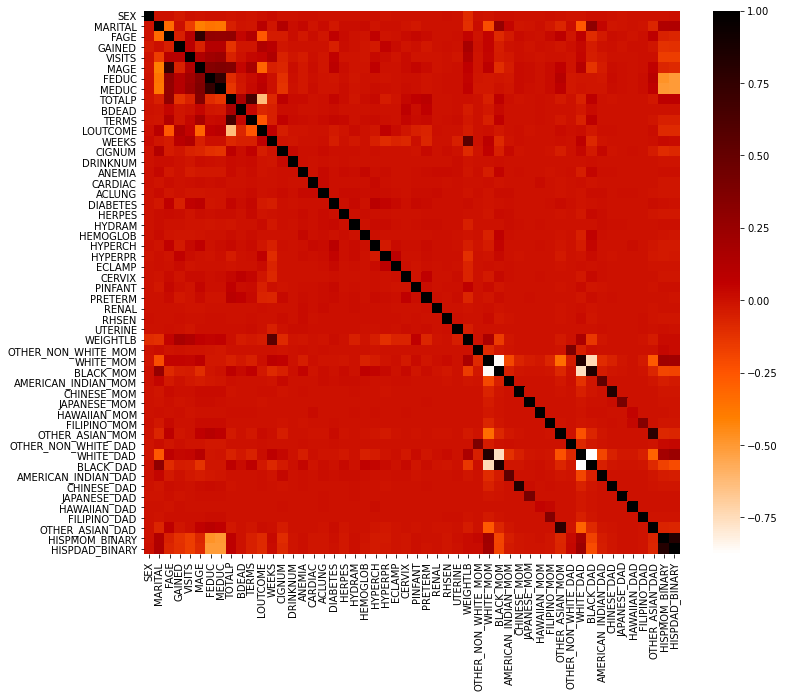

In [43]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(missingValDF.corr(), cmap='gist_heat_r', annot = False)

## Effect of Smoking on Birth Weight

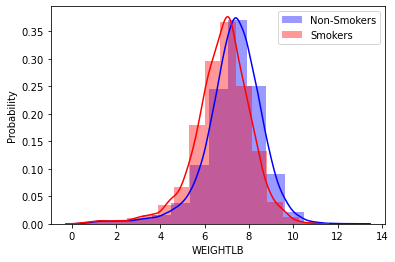

In [44]:
noCigList = missingValDF['WEIGHTLB'][missingValDF['CIGNUM']==0.0]
sns.distplot(noCigList, bins= 15, color = 'blue', hist=True, label= 'Non-Smokers')
cigList = missingValDF['WEIGHTLB'][missingValDF['CIGNUM'] != 0.0]
sns.distplot(cigList, bins = 15, color = 'red', hist=True, label= 'Smokers')
plt.ylabel('Probability')
plt.legend()
plt.show()

## Effect of Drinking on Birth Weight

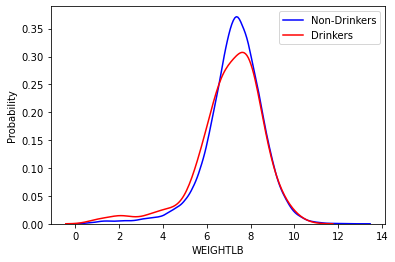

In [45]:
noDrinkList = missingValDF['WEIGHTLB'][missingValDF['DRINKNUM']==0.0]
sns.distplot(noDrinkList, bins= 15, color = 'blue', hist=False, label= 'Non-Drinkers')
#cigList = missingValDF['WEIGHTLB'][missingValDF['CIGNUM'].isin(frange(1.0,99.0,1.0))]
drinkList = missingValDF['WEIGHTLB'][missingValDF['DRINKNUM'] != 0.0]
sns.distplot(drinkList, bins = 15, color = 'red', hist=False, label= 'Drinkers')
plt.ylabel('Probability')
plt.legend()
plt.show()

## Birth Weight Distribution according to Gender

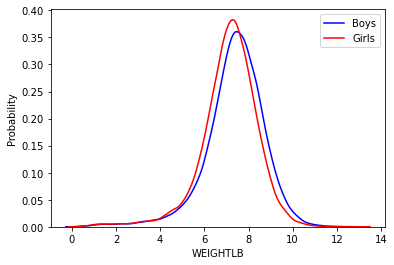

In [46]:
boyList = missingValDF['WEIGHTLB'][missingValDF['SEX']== 1.0]
sns.distplot(boyList, bins= 15, color = 'blue', hist=False, label= 'Boys')
#cigList = missingValDF['WEIGHTLB'][missingValDF['CIGNUM'].isin(frange(1.0,99.0,1.0))]
girlList = missingValDF['WEIGHTLB'][missingValDF['SEX'] == 2.0]
sns.distplot(girlList, bins = 15, color = 'red', hist=False, label= 'Girls')
plt.ylabel('Probability')
plt.legend()
plt.show()

## Birth Weight Distribution according to APGAR Score

<AxesSubplot:>

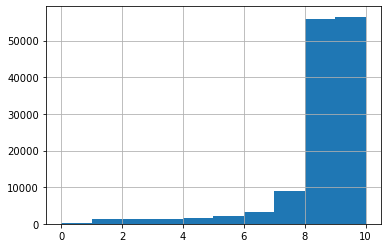

In [47]:
birthDF = birthDF[birthDF['APGAR1']!=99]
ap = birthDF['APGAR1']
ap.hist()

<AxesSubplot:>

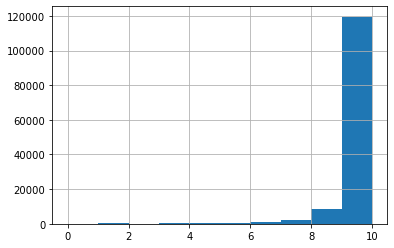

In [48]:
birthDF = birthDF[birthDF['APGAR5']!=99]
ap = birthDF['APGAR5']
ap.hist()

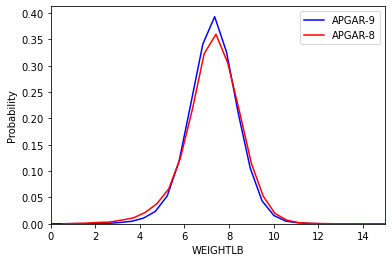

In [49]:
birthDF['WEIGHTLB'] =(birthDF['BPOUND']) + (0.0625 *birthDF['BOUNCE'])

birthDF['WEIGHTLB']
apList1 = birthDF['WEIGHTLB'][birthDF['APGAR1']== 9.0]
sns.distplot(apList1, bins= 15, color = 'blue', hist=False, label= 'APGAR-9')
#cigList = missingValDF['WEIGHTLB'][missingValDF['CIGNUM'].isin(frange(1.0,99.0,1.0))]
apList2 = birthDF['WEIGHTLB'][birthDF['APGAR1']== 8.0]
sns.distplot(apList2, bins = 15, color = 'red', hist=False, label= 'APGAR-8')
plt.ylabel('Probability')
plt.xlim((0,15))
plt.legend()
plt.show()

In [50]:
missingValDF.columns

Index(['SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC', 'MEDUC',
       'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'CIGNUM', 'DRINKNUM',
       'ANEMIA', 'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM',
       'HEMOGLOB', 'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT',
       'PRETERM', 'RENAL', 'RHSEN', 'UTERINE', 'WEIGHTLB',
       'OTHER_NON_WHITE_MOM', 'WHITE_MOM', 'BLACK_MOM', 'AMERICAN_INDIAN_MOM',
       'CHINESE_MOM', 'JAPANESE_MOM', 'HAWAIIAN_MOM', 'FILIPINO_MOM',
       'OTHER_ASIAN_MOM', 'OTHER_NON_WHITE_DAD', 'WHITE_DAD', 'BLACK_DAD',
       'AMERICAN_INDIAN_DAD', 'CHINESE_DAD', 'JAPANESE_DAD', 'HAWAIIAN_DAD',
       'FILIPINO_DAD', 'OTHER_ASIAN_DAD', 'HISPMOM_BINARY', 'HISPDAD_BINARY'],
      dtype='object')

## Birth Weight Distribution according to Race

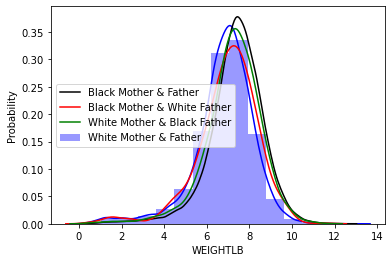

In [68]:
blackMomList = missingValDF['WEIGHTLB'][missingValDF['BLACK_MOM']==1.0]
blackList = blackMomList[missingValDF['BLACK_DAD']==1.0]
blackWhiteList = blackMomList[missingValDF['WHITE_DAD']==1.0]

whiteMomList = missingValDF['WEIGHTLB'][missingValDF['WHITE_MOM']==1.0]
whiteList = whiteMomList[missingValDF['WHITE_DAD']==1.0]
whiteBlackList = whiteMomList[missingValDF['BLACK_DAD']==1.0]


sns.distplot(blackList, bins= 15, color = 'blue', hist=True, label= 'White Mother & Father')
sns.distplot(whiteList, bins = 15, color = 'black', hist=False, label= 'Black Mother & Father')
sns.distplot(blackWhiteList, bins = 15, color = 'red', hist=False, label= 'Black Mother & White Father')
sns.distplot(whiteBlackList, bins = 15, color = 'green', hist=False, label= 'White Mother & Black Father')
#sns.distplot(blackDadList, bins= 15, color = 'green', hist=False, label= 'White Fathers')
#sns.distplot(whiteDadList, bins = 15, color = 'black', hist=False, label= 'Black Fathers')
plt.ylabel('Probability')
plt.legend()
plt.show()

## Birth Weight Distribution according to Weeks of Pregnancy

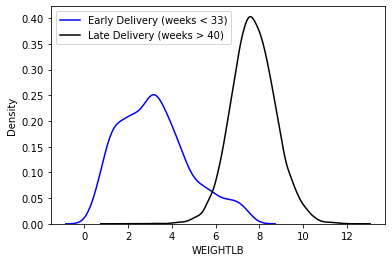

In [52]:
early = missingValDF['WEIGHTLB'][missingValDF['WEEKS']<33.0]
late = missingValDF['WEIGHTLB'][missingValDF['WEEKS']>40.0]
sns.distplot(early, bins= 15, color = 'blue', hist=False, label= 'Early Delivery (weeks < 33)')
sns.distplot(late, bins = 15, color = 'black', hist=False, label= 'Late Delivery (weeks > 40)')
plt.legend()

## Birth Weight Distribution according to No. of  Pregnancy

In [53]:
len(missingValDF[missingValDF['TOTALP'] == 1])

34153

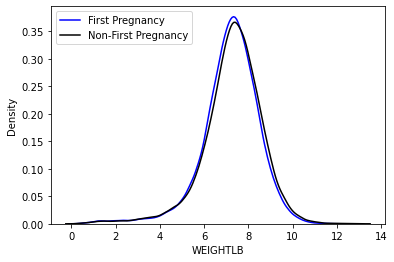

In [54]:
TP1 = missingValDF['WEIGHTLB'][missingValDF['TOTALP']==1.0]
TP2 = missingValDF['WEIGHTLB'][missingValDF['TOTALP']!=1.0]
sns.distplot(TP1, bins= 15, color = 'blue', hist=False, label= 'First Pregnancy')
sns.distplot(TP2, bins = 15, color = 'black', hist=False, label= 'Non-First Pregnancy')

plt.legend()
plt.show()

## A brief overview of models and evaluation framework

In [64]:
from sklearn import linear_model
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import sklearn.metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [65]:
#we are excluding sammi's sample case for now
testDF[:-1]

,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,BDEAD,TERMS,LOUTCOME,WEEKS,CIGNUM,DRINKNUM,ANEMIA,CARDIAC,ACLUNG,DIABETES,HERPES,HYDRAM,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,OTHER_NON_WHITE_MOM,WHITE_MOM,BLACK_MOM,AMERICAN_INDIAN_MOM,CHINESE_MOM,JAPANESE_MOM,HAWAIIAN_MOM,FILIPINO_MOM,OTHER_ASIAN_MOM,OTHER_NON_WHITE_DAD,WHITE_DAD,BLACK_DAD,AMERICAN_INDIAN_DAD,CHINESE_DAD,JAPANESE_DAD,HAWAIIAN_DAD,FILIPINO_DAD,OTHER_ASIAN_DAD,HISPMOM_BINARY,HISPDAD_BINARY
0,2.0,2.0,23.0,20.0,12.0,24.0,12.0,13.0,1.0,0.0,0.0,9.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,31.0,36.0,8.0,28.0,12.0,2.0,3.0,0.0,0.0,1.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,2.0,1.0,19.0,40.0,10.0,20.0,12.0,12.0,2.0,0.0,1.0,2.0,37.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,2.0,2.0,23.0,25.0,7.0,22.0,13.0,13.0,2.0,0.0,0.0,1.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,1.0,1.0,39.0,38.0,8.0,34.0,17.0,17.0,3.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133174,1.0,2.0,20.0,37.0,13.0,18.0,12.0,12.0,2.0,0.0,1.0,2.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133175,2.0,1.0,31.0,21.0,10.0,26.0,12.0,12.0,4.0,0.0,1.0,1.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133185,2.0,1.0,36.0,32.0,12.0,36.0,17.0,14.0,1.0,0.0,0.0,9.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133209,2.0,1.0,41.0,40.0,10.0,41.0,14.0,16.0,2.0,0.0,0.0,1.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
testDF

,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,BDEAD,TERMS,LOUTCOME,WEEKS,CIGNUM,DRINKNUM,ANEMIA,CARDIAC,ACLUNG,DIABETES,HERPES,HYDRAM,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,OTHER_NON_WHITE_MOM,WHITE_MOM,BLACK_MOM,AMERICAN_INDIAN_MOM,CHINESE_MOM,JAPANESE_MOM,HAWAIIAN_MOM,FILIPINO_MOM,OTHER_ASIAN_MOM,OTHER_NON_WHITE_DAD,WHITE_DAD,BLACK_DAD,AMERICAN_INDIAN_DAD,CHINESE_DAD,JAPANESE_DAD,HAWAIIAN_DAD,FILIPINO_DAD,OTHER_ASIAN_DAD,HISPMOM_BINARY,HISPDAD_BINARY
0,2.0,2.0,23.0,20.0,12.0,24.0,12.0,13.0,1.0,0.0,0.0,9.0,35.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,31.0,36.0,8.0,28.0,12.0,2.0,3.0,0.0,0.0,1.0,36.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,2.0,1.0,19.0,40.0,10.0,20.0,12.0,12.0,2.0,0.0,1.0,2.0,37.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,2.0,2.0,23.0,25.0,7.0,22.0,13.0,13.0,2.0,0.0,0.0,1.0,38.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,1.0,1.0,39.0,38.0,8.0,34.0,17.0,17.0,3.0,0.0,0.0,1.0,33.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133175,2.0,1.0,31.0,21.0,10.0,26.0,12.0,12.0,4.0,0.0,1.0,1.0,43.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133185,2.0,1.0,36.0,32.0,12.0,36.0,17.0,14.0,1.0,0.0,0.0,9.0,40.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133209,2.0,1.0,41.0,40.0,10.0,41.0,14.0,16.0,2.0,0.0,0.0,1.0,35.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133223,1.0,1.0,38.0,17.0,12.0,33.0,16.0,16.0,3.0,0.0,0.0,9.0,38.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Baseline Model

Our baseline model just considers the average of all the birth weights in the data set.

In [67]:
testDFCopy = testDF.iloc[:-1]
testDFCopy['BASELINE_WEIGHT'] = np.mean(testWeight)
testDFCopy['ACTUAL_WEIGHT'] = testWeight
print('MAE: ',metrics.mean_absolute_error(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['BASELINE_WEIGHT']))
print('MSE: ',metrics.mean_squared_error(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['BASELINE_WEIGHT']))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['BASELINE_WEIGHT'])))
print("R2 score: ",r2_score(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['BASELINE_WEIGHT']))
print("EVS: ",explained_variance_score(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['BASELINE_WEIGHT']))



NameError: name 'metrics' is not defined

### Prediction on Sammi

The prediction of baseline model on sammi is just the average of all weights in the dataset.

In [63]:
print ("Prediction for Sammi's child according to Baseline Model is", np.mean(testWeight))

Prediction for Sammi's child according to Baseline Model is 7.240220649861389


## Linear Regression Model

In [ ]:
clf = linear_model.LinearRegression()
clf.fit(trainDF, trainWeight)
coeffArray = clf.coef_
intercept = clf.intercept_

In [ ]:
print ("The co-efficients and the intercept determined by the OLS Regression are:")
print ("-----------------Co-efficients----------------------")
print (coeffArray)
print ("-----------------Intercept--------------------------")
print(intercept)

## Testing the Linear Regression Model on our test data set

In [ ]:
lrPrediction = clf.predict(testDF)

In [ ]:
testDFCopy = testDF.iloc[:-1]
testDFCopy['ACTUAL_WEIGHT'] = testWeight

In [ ]:
testDFCopy['PREDICTED_WEIGHT_LR'] = lrPrediction[:-1]

## Evaluation

In [ ]:
print('MAE: ',metrics.mean_absolute_error(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['PREDICTED_WEIGHT_LR']))
print('MSE: ',metrics.mean_squared_error(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['PREDICTED_WEIGHT_LR']))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['PREDICTED_WEIGHT_LR'])))
print("R2 score: ",r2_score(testDFCopy['ACTUAL_WEIGHT'], testDFCopy['PREDICTED_WEIGHT_LR']))
print("EVS: ",explained_variance_score(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['PREDICTED_WEIGHT_LR']))


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['PREDICTED_WEIGHT_LR'])
#plt.plot(y_test,y_pred)
plt.plot([0,50],[0,50],'g')
plt.xlabel('Actual Value',fontsize='x-large')
plt.ylabel('Predicted Value', fontsize='x-large')
plt.title('Scatter plot of Real Test Value and Predicted Value',fontsize='xx-large')

## Prediction on Sammi's child

In [ ]:
print ("Prediction for Sammi's child according to Linear Regression is", lrPrediction[-1])

In [ ]:
lrPrediction[-1]

## Ridge Regression Model

In [ ]:
clf = linear_model.Ridge(alpha = 0.5)
clf.fit(trainDF, trainWeight)
coeffArray = clf.coef_
intercept = clf.intercept_

In [ ]:
print ("The co-efficients and the intercept determined by the Ridge Regression are:")
print ("-----------------Co-efficients----------------------")
print (coeffArray)
print ("-----------------Intercept--------------------------")
print (intercept)

In [ ]:
ridgePrediction = clf.predict(testDF)

## Evaluation

In [ ]:
testDFCopy['PREDICTED_WEIGHT_RIDGE'] = ridgePrediction[:-1]
print('MAE: ',metrics.mean_absolute_error(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['PREDICTED_WEIGHT_RIDGE']))
print('MSE: ',metrics.mean_squared_error(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['PREDICTED_WEIGHT_RIDGE']))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['PREDICTED_WEIGHT_RIDGE'])))
print("R2 score: ",r2_score(testDFCopy['ACTUAL_WEIGHT'], testDFCopy['PREDICTED_WEIGHT_RIDGE']))
print("EVS: ",explained_variance_score(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['PREDICTED_WEIGHT_RIDGE']))

## Prediction on Sammi's child

In [ ]:
print ("Prediction for Sammi's child according to Ridge Regression is", ridgePrediction[-1])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
scaled_features=scaler.transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(scaled_features,y,test_size=0.30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix

In [ ]:
accuracy= []
for i in range(1,40):
        knn=KNeighborsClassifier(n_neighbors= i )
        knn.fit(x_train,y_train)
        pred=knn.predict(x_test)
        accuracy.append(accuracy_score(y_test, pred))

## Decision Tree with Boosting - AdaBoost Regressor

In [ ]:
rng = np.random.RandomState(1)
clf_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8),
                          n_estimators=30, random_state=rng)
clf_2.fit(trainDF, trainWeight)

# Predict
adaBoostPrediction = clf_2.predict(testDF)

In [ ]:
testDFCopy['Adaboost'] = adaBoostPrediction[:-1]

## Evaluation

In [ ]:
print('MAE: ',metrics.mean_absolute_error(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['Adaboost']))
print('MSE: ',metrics.mean_squared_error(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['Adaboost']))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['Adaboost'])))
print("R2 score: ",r2_score(testDFCopy['ACTUAL_WEIGHT'], testDFCopy['Adaboost']))
print("EVS: ",explained_variance_score(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['Adaboost']))

## Prediction on Sammi's child

In [ ]:
print ("Prediction for Sammi's child according to Ridge Regression is", adaBoostPrediction[-1])

## Random Forest Regressor

In [ ]:
clf_1 = RandomForestRegressor(max_depth=10)
clf_1.fit(trainDF, trainWeight)

# Predict
randomForestPrediction = clf_1.predict(testDF)

## Evaluation

In [ ]:
testDFCopy['RandomForest'] = randomForestPrediction[:-1]
print('MAE: ',metrics.mean_absolute_error(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['RandomForest']))
print('MSE: ',metrics.mean_squared_error(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['RandomForest']))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['RandomForest'])))
print("R2 score: ",r2_score(testDFCopy['ACTUAL_WEIGHT'], testDFCopy['RandomForest']))
print("EVS: ",explained_variance_score(testDFCopy['ACTUAL_WEIGHT'],testDFCopy['RandomForest']))

## Prediction on Sammi

In [ ]:
print( "Prediction for Sammi's child according to Random Forest Regression Model is",randomForestPrediction[-1])

In [ ]:


testDFCopy.iloc[:,51:56]

In [ ]:
d= pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest Classifier', 'Decision Tree'],
    'Accuracy': [ acc_lm,acc_rf, acc_dt]})
d
sns.barplot(x='Model',y='Accuracy',data=d)

In [ ]:
pd.set_option('display.max_columns', 10)
pd.set_op



tion('display.width', 2000)
newDF= pd.DataFrame(dictny)
newDF